In [1]:
import torch
import torch.nn as nn
import random
import gym
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros import SuperMarioBrosEnv
from tqdm import tqdm
import pickle 
import gym
import numpy as np
import collections 
import cv2
import matplotlib.pyplot as plt
import time
import datetime
import json
from toolkit.gym_env import *
from toolkit.action_utils import *
from toolkit.train_marlios_rnn import *
from toolkit.constants import *
from toolkit.train_test_samples import *
import warnings

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

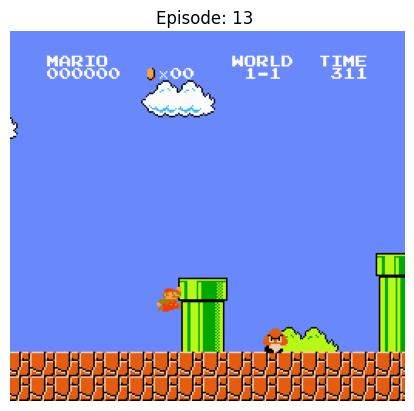

  1%|▏         | 13/1000 [01:44<2:12:32,  8.06s/it]


KeyboardInterrupt: 

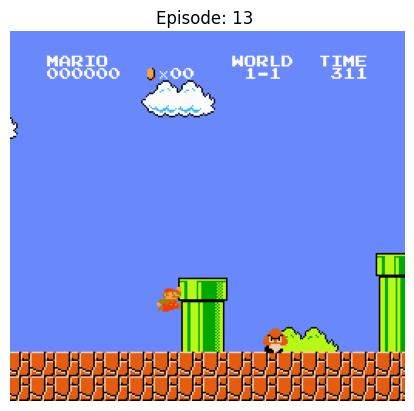

In [3]:
# checking out the run on simple movement
visualize(run_id='marlios_rnn_test', action_space=TRAIN_SET, n_actions=64, randomness=True, sample_every='episode', training_stage='train', hidden_shape = 64, debug=True)

In [ ]:
total_rewards = load_item('total_rewards-{}.pkl'.format(run_id))
plot_rewards(ep_per_stat=100, total_rewards=total_rewards)

In [ ]:
total = len(TRAIN_SET)+len(TEST_SET)+len(VALIDATION_SET)
print("Percentages for Train/Test/Split:")
print("Train: {:.2f}".format(len(TRAIN_SET)/total))
print("Test: {:.2f}".format(len(TEST_SET)/total))
print("Validation: {:.2f}".format(len(VALIDATION_SET)/total))